<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/RO/cvicenia/notebooky/cv09_en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees, Random Forests, Boosting

In this lab we will cover decision trees and related methods. 

We will work with the same datasets as before.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!tail -n 16 adult.names

--2022-04-12 00:17:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  2.15MB/s    in 1.8s    

2022-04-12 00:17:53 (2.15 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-04-12 00:17:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

data = pd.read_csv('adult.data', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'], sep=",")
print(data.head())
print(55 * '*')
print(data.describe())

data_X = data.drop('salary', axis='columns')
data_y = data['salary']

cat_ix = data_X.select_dtypes(include=['object', 'bool']).columns

for cat in cat_ix:
  one_hot = pd.get_dummies(data_X[cat], prefix=cat)
  data_X = data_X.drop(cat, axis='columns')
  data_X = data_X.join(one_hot)

print(data_X.shape)
print(data_X)

le = LabelEncoder()
data_y = le.fit_transform(data_y)

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50

## Decision Tree

We will use `sklearn.tree.DecisionTreeClassifier`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=0) 

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print(classification_report(y_test, y_pred))
print("Depth of tree: ", dtc.get_depth())

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4918
           1       0.61      0.62      0.61      1595

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513

Depth of tree:  52


### Exercise - Pruning

Now you should try two different ways of preventing overfitting. Plot two graphs which show either the maximum depth or the minimum number of samples per leaf on the x-axis and the test accuracy on the y axis.

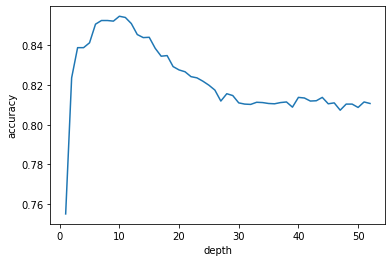

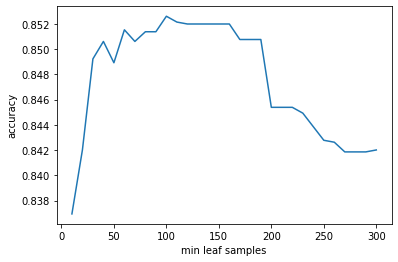

In [ ]:
from matplotlib import pyplot as plt

depths = np.arange(1, 53)
accs = []

for d in depths:
  dtc = DecisionTreeClassifier(max_depth=d)
  dtc.fit(X_train, y_train)
  y_pred = dtc.predict(X_test)
  accs.append(np.sum(y_pred == y_test)/len(y_test))

plt.plot(depths, accs)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()


min_leaf_list = np.arange(10, 301, 10)
accs = []

for l in min_leaf_list:
  dtc = DecisionTreeClassifier(min_samples_leaf=l)
  dtc.fit(X_train, y_train)
  y_pred = dtc.predict(X_test)
  accs.append(np.sum(y_pred == y_test)/len(y_test))

plt.plot(min_leaf_list, accs)
plt.xlabel('min leaf samples')
plt.ylabel('accuracy')
plt.show()

## Visualizing trees

We can visualize a tree by usgin `sklearn.tree.plot_tree`. In order to do that we should use som smaller depth so the tree is understandable.

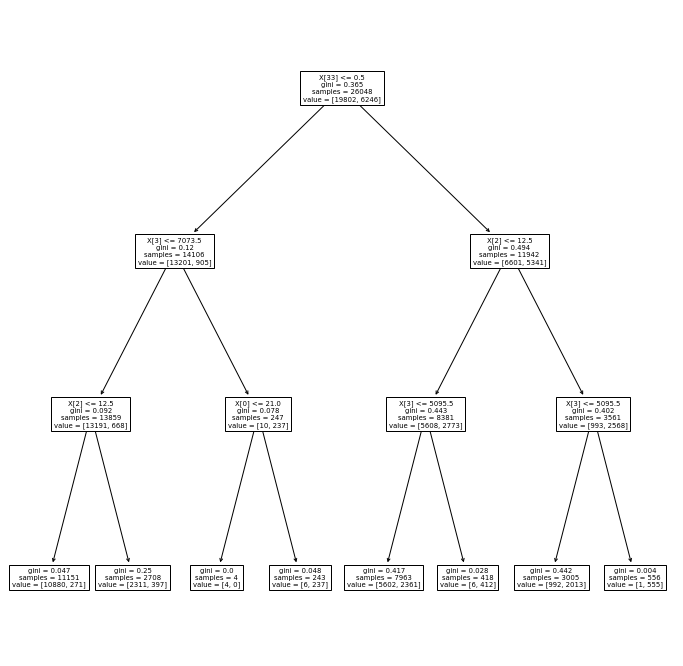

In [ ]:
from sklearn.tree import plot_tree

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

plt.figure(figsize=(12, 12))
plot_tree(dtc)
plt.show()

## Random Forests

We can use Random Forests from `sklearn.ensemble.RandomForestClassifier`. 

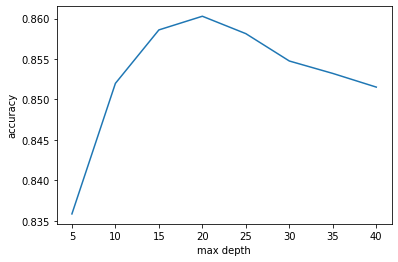

In [ ]:
from sklearn.ensemble import RandomForestClassifier

depths = np.arange(5, 41, 5)
accs = []

for d in depths:
  forest = RandomForestClassifier(max_depth=d)
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)
  accs.append(np.sum(y_pred == y_test)/len(y_test))

plt.plot(depths, accs)
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()


## Boosting

Similarly, we can use AdaBoost from `sklearn.ensemble.AdaBoostClassifier`.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4918
           1       0.75      0.51      0.61      1595

    accuracy                           0.84      6513
   macro avg       0.80      0.73      0.75      6513
weighted avg       0.83      0.84      0.83      6513



### Exercise - Accuracies of individual trees

Now try to print out the accuracies of the individual trees. From a trained Random Forest and separately using AdaBoost. Check out the documentation on how to do this.

In [ ]:
forest = RandomForestClassifier(max_depth=20)
forest.fit(X_train.values, y_train)

print(20 * '*')
print('Random forest')
print(20 * '*')

print(classification_report(y_test, forest.predict(X_test)))

for i, dtc in enumerate(forest.estimators_):
  print("For {}-th forest train acc: {}, test acc: {}, depth: {}".format(i, np.mean(dtc.predict(X_train.values) == y_train), np.mean(dtc.predict(X_test.values) == y_test), dtc.get_depth()))



adaboost = AdaBoostClassifier()
adaboost.fit(X_train.values, y_train)

print(20 * '*')
print('Random forest')
print(20 * '*')

print(classification_report(y_test, adaboost.predict(X_test)))

for i, dtc in enumerate(adaboost.estimators_):
  print("For {}-th forest train acc: {}, test acc: {}, depth: {}".format(i, np.mean(dtc.predict(X_train.values) == y_train), np.mean(dtc.predict(X_test.values) == y_test), dtc.get_depth()))

********************
Random forest
********************
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4918
           1       0.77      0.61      0.68      1595

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

For 0-th forest train acc: 0.8693565724815725, test acc: 0.8186703516044833, depth: 20


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For 1-th forest train acc: 0.8790310196560197, test acc: 0.8240442192538001, depth: 20
For 2-th forest train acc: 0.8767275798525799, test acc: 0.8271150007676954, depth: 20
For 3-th forest train acc: 0.8670531326781327, test acc: 0.8137571011822509, depth: 20
For 4-th forest train acc: 0.8764972358722358, test acc: 0.8281897742975587, depth: 20
For 5-th forest train acc: 0.8730036855036855, test acc: 0.8162137263933671, depth: 20
For 6-th forest train acc: 0.882870085995086, test acc: 0.8311070167357593, depth: 20
For 7-th forest train acc: 0.8807585995085995, test acc: 0.8303393213572854, depth: 20
For 8-th forest train acc: 0.868166461916462, test acc: 0.8226623675725472, depth: 20
For 9-th forest train acc: 0.8784935503685504, test acc: 0.8261937663135268, depth: 20
For 10-th forest train acc: 0.8746928746928747, test acc: 0.8275756179947796, depth: 20
For 11-th forest train acc: 0.8644809582309583, test acc: 0.8198986642100414, depth: 20
For 12-th forest train acc: 0.8689342751842

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For 2-th forest train acc: 0.8040540540540541, test acc: 0.7968678028558268, depth: 1
For 3-th forest train acc: 0.48790694103194104, test acc: 0.5029940119760479, depth: 1
For 4-th forest train acc: 0.7040079852579852, test acc: 0.6929218486104713, depth: 1
For 5-th forest train acc: 0.7728040540540541, test acc: 0.769384308306464, depth: 1
For 6-th forest train acc: 0.3444410319410319, test acc: 0.3480730846000307, depth: 1
For 7-th forest train acc: 0.378992628992629, test acc: 0.38584369722094275, depth: 1
For 8-th forest train acc: 0.2663544226044226, test acc: 0.278826961461692, depth: 1
For 9-th forest train acc: 0.7561808968058968, test acc: 0.7512666973744818, depth: 1
For 10-th forest train acc: 0.39223740786240785, test acc: 0.39275295562720713, depth: 1
For 11-th forest train acc: 0.2629760442260442, test acc: 0.2694610778443114, depth: 1
For 12-th forest train acc: 0.3329622235872236, test acc: 0.33609703669583907, depth: 1
For 13-th forest train acc: 0.7574861793611793, t

### Exercise - AdaBoost with a different base estimator

Now you should try to change the properties of the decision tree that will be used in AdaBoost. Try to again plot the relationship between the depth of the Trees and the resulting test accuracy.

*Note:* This might take a while!

Text(0, 0.5, 'test accuracy')

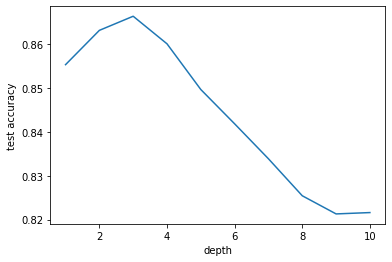

In [ ]:
depths = np.arange(1, 11)
accs = []
for d in depths:
  dtc = DecisionTreeClassifier(max_depth=d)

  adaboost = AdaBoostClassifier(base_estimator=dtc)
  adaboost.fit(X_train, y_train)

  accs.append(np.mean(y_test == adaboost.predict(X_test)))

plt.plot(depths, accs)
plt.xlabel('depth')
plt.ylabel('test accuracy')

## Exercise - Automated Hyperparamter search

In the 7th lab we learned how to perform validation and cross validation. We also tested how changing various hyperparameters led to improved results. This time we will try to use sklearn to automate this process.

To speed things up we will use a simpler dataset.

In [ ]:
from sklearn import datasets

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456789)

Now you should try to use `sklearn.model_selection.RandomizedSearchCV` to find the optimal parameters for a random forest. You should try to vary the maximum depth of the trees, the number of trees, the criterion. YOu calso try other parameters.

In order to see how the search is performed you should initialize the `RandomizedSearchCV` with parameter `verbose=2`. Changing the parameter `n_iter` will change how many iterations we want.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

forest = RandomForestClassifier()

params = {'max_depth': np.arange(1,21), 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 6, 8], 'n_estimators': [20, 40, 60, 80, 100]}

rand_search = RandomizedSearchCV(forest, params, verbose=2, n_iter=100)

search = rand_search.fit(X_train, y_train)
print("Best params: ", search.best_params_)

best_forest = RandomForestClassifier(**search.best_params_)
best_forest.fit(X_train, y_train)

print(classification_report(y_test, best_forest.predict(X_test)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, min_samples_split=8, n_e